In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table
import astropy.units as u
from astropy.constants import G
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

mpl.rcParams['text.usetex'] = True
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 14

In [21]:
dat = Table.read('Gianninas2011_Table.txt',format='cds')
hermesb = np.loadtxt('Hermes_2013_MNRAS_436_3573.txt', delimiter=' ')
hermesb_V = hermesb[hermesb[:,-1]==1]
hermesb_C = hermesb[hermesb[:,-1]==0]
hermesa = np.loadtxt('Hermes_2013a_ApJ_765_102.txt', delimiter=' ')
hermes2012 = np.loadtxt('Hermes_2012_ApJ_750_L28.txt', delimiter=' ')
steinfadt = np.loadtxt('steinfadt.txt', delimiter=' ')

In [4]:
dat.show_in_notebook(display_length=10)

idx,WD,Name,SpType,Teff,e_Teff,logg,e_logg,Mass,e_Mass,VMag,Dis,Notes
,,,,K,K,[cm/s2],[cm/s2],Msun,Msun,mag,pc,
0,0000+171,PG 0000+172,DA2.4,21130,325,8.0,0.05,0.63,0.03,10.68,108,--
1,0000-186,GD 575,DA3.3,15350,265,7.97,0.05,0.6,0.03,11.19,105,--
2,0001+433,RE J0003+433,DA1.1,46850,1244,9.05,0.1,1.23,0.04,11.24,118,--
3,0004+061,PHL 670,DA2.1,24400,386,8.51,0.05,0.94,0.03,11.23,100,--
4,0004+330,GD 2,DA1.0,49980,898,7.77,0.06,0.59,0.02,8.79,103,--
5,0005-163,G158-132,DA3.4,14920,252,7.93,0.05,0.57,0.03,11.18,104,1
6,0008+424,LP 192-41,DA7.0,7200,107,8.12,0.07,0.66,0.05,13.64,21,--
7,0009+501,G217-37,DA7.6,6620,103,8.4,0.09,0.85,0.06,14.42,10,1
8,0009-058,G158-39,DA4.8,10560,156,8.22,0.06,0.74,0.04,12.34,54,--


In [5]:
zz_ceti = dat[dat['Notes']=='3']
const = dat[dat['Notes']=='1']

In [78]:
M1 = 0.333*u.M_sun
M1err = 0.018*u.M_sun
M2 = 0.309*u.M_sun
M2err = 0.017*u.M_sun
R1 = 0.02080*u.R_sun
R1err = 0.0003*u.R_sun
R2 = 0.01878*u.R_sun
R2err = 0.0004*u.R_sun

loggerr1 = 0.434*np.sqrt((M1err/M1)**2+(R1err/R1)**2)
loggerr2 = 0.434*np.sqrt((M2err/M2)**2+(R2err/R2)**2)

logg1 = np.log10(((G*M1)/(R1**2)).to(u.cm / u.s / u.s).value)
logg2 = np.log10(((G*M2)/(R2**2)).to(u.cm / u.s / u.s).value)
print(logg1,loggerr1)
print(logg2,loggerr2)

7.32438519088393 0.024280218757114516
7.380634930867783 0.025603934519796312


In [8]:
errs = np.array([360,300]).reshape(2,1)
print(errs)

[[360]
 [300]]


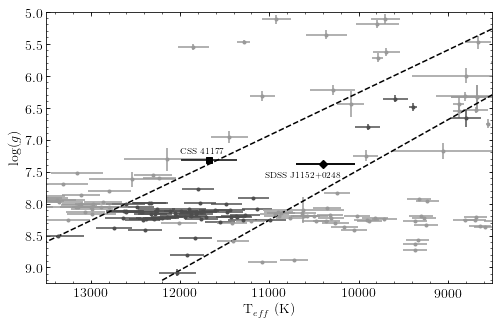

In [79]:
fig, ax = plt.subplots(figsize=(8,5))
ax.errorbar(zz_ceti['Teff'],zz_ceti['logg'],xerr=zz_ceti['e_Teff'],marker='.',ls='none',color='0.3')
ax.errorbar(const['Teff'],const['logg'],xerr=const['e_Teff'],marker='.',ls='none',color='0.6')
ax.errorbar(10400,7.38,marker='D',xerr=errs,color='0')
ax.errorbar(12030,9.08, xerr=210,yerr=0.06,marker='.',ls='none',color='0.3') # hermes heavy WD 2013c
ax.errorbar(steinfadt[:,0], steinfadt[:,2], xerr=steinfadt[:,1], yerr=steinfadt[:,3],marker='.',ls='none',color='0.6')
ax.errorbar(hermesa[:,0], hermesa[:,2], xerr=hermesa[:,1], yerr=hermesa[:,3],marker='.',ls='none',color='0.6')
ax.errorbar(hermesb_C[:,0], hermesb_C[:,2], xerr=hermesb_C[:,1], yerr=hermesb_C[:,3],marker='.',ls='none',color='0.6')
ax.errorbar(hermesb_V[:,0], hermesb_V[:,2], xerr=hermesb_V[:,1], yerr=hermesb_V[:,3],marker='.',ls='none',color='0.3')
ax.errorbar(hermes2012[:,0], hermes2012[:,2], xerr=hermes2012[:,1], yerr=hermes2012[:,3],marker='.',ls='none',color='0.6')
ax.set_xlim([13500,8500])
ax.set_ylim([9.25,5])
ax.set_xlabel('T$_{eff}$ (K)')
ax.set_ylabel('log($g$)')
ax.annotate('SDSS J1152+0248', (11050,7.6),fontsize=9)
ax.annotate('CSS 41177', (12000,7.23),fontsize=9)

ax.plot([14400,8400],[9.2,5.2], 'k--')
ax.plot([12200,7100],[9.2,5.2], 'k--')

ax.errorbar(10400,7.38,marker='D',xerr=errs, yerr=0.026,color='0')
ax.errorbar(11678,7.32,marker='s',xerr=313, yerr=0.02,color='0')

majorLocatorx = MultipleLocator(1000)
minorLocatorx = MultipleLocator(200)
majorLocatory = MultipleLocator(0.5)
minorLocatory = MultipleLocator(0.1)

ax.xaxis.set_major_locator(majorLocatorx)
ax.yaxis.set_major_locator(majorLocatory)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
ax.tick_params(direction='in',which='both',right=True,top=True)
fig.savefig('instabilitystrip.pdf')
plt.show()